In [1]:
from matplotlib import pyplot as plt
import numpy as np

def gaussian(x, mu, sig):
    return (1./(sig*np.sqrt(2*np.pi)))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def doubleGauss(x,sig1,mu2,sig2,p):
    return p *2 *gaussian(x, 0, sig1)* (x>=0) + (1-p) * gaussian(x, mu2, sig2)

def PMax(r):
    if (np.pi*r**2/(np.pi*r**2 + np.pi - 2*r**2 - 2) <= 1):
        return np.pi*r**2/(np.pi*r**2 + np.pi - 2*r**2 - 2)
    else:
        return 1

def ax(p,res):
    return ((2/np.pi)*p**2-p/(res**2+1))

def bx(p,mu2):
    return (np.sqrt(2/np.pi)*2*p*(1-p)*mu2)

def cx(sig2,mu2,res,p):
    return (1-p)**2*mu2**2 - (1-p)*(sig2**2+mu2**2)/(res**2+1)

def delta(p,res,sig2,mu2):
    return bx(p,mu2)*bx(p,mu2) - 4*ax(p,res)*cx(sig2,mu2,res,p)

def ParamU(p,r):
    return ((8*(1-p)**2*p**2)/np.pi - 4*(2*p**2/np.pi - p/(r**2+1))*((1-p)**2-(1-p)/(r**2+1)))

def ParamS(p,r):
    return (4*(2*p**2/np.pi - p/(r**2+1))*(1-p))/(r**2+1)

def SigMin(p,res,mu2):
    return mu2*np.sqrt((-ParamU(p,res)+(bx(p,mu2)**2/mu2**2))/(ParamS(p,res)))

def SigMax(p,res,mu2):
    return mu2*np.sqrt((-ParamU(p,res))/(ParamS(p,res)))

def sigma1(p,res,sig2,mu2):
    return (-bx(p,mu2)+np.sqrt(delta(p,res,sig2,mu2)))/(2*ax(p,res))

def sigma2(n,p,res,mu2):
    if ((-ParamU(p,res)+(bx(p,mu2)**2/mu2**2))/(ParamS(p,res)) > 0):
        return SigMin(p,res,mu2)+n*(SigMax(p,res,mu2)-SigMin(p,res,mu2))
    else:
        return n*SigMax(p,res,mu2)
    
def doubleGaussConstrained(x,pp,res,mu2,n):
    p = pp*PMax(res)
    sig2 = sigma2(n,p,res,mu2)
    sig1 = sigma1(p,res,sig2,mu2)
    spe = doubleGauss(x,sig1,mu2,sig2,p) 
    return spe



gain :  57.98098120737237
1.0000078812504503


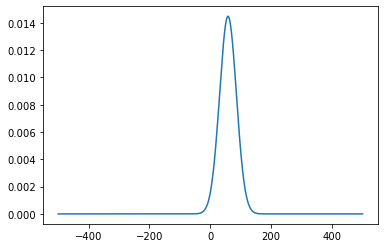

In [2]:
x = np.linspace(-100,300,401)
x2 = np.linspace(-500,500,1001)

##Fixed param
pp  = 0.001
nn  = 0.7


mu2 = 58.
res = 0.475


spe = doubleGaussConstrained(x2,pp,res,mu2,nn)
plt.plot(x2,spe)
gain = np.sum(x2*doubleGaussConstrained(x2,pp,res,mu2,nn))
print("gain : ",gain)
print(spe.sum())

gain :  58.031506236942725
1.0035145320367818


Text(0, 0.5, 'A.U.')

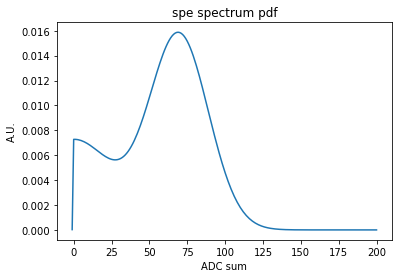

In [3]:
x = np.linspace(-100,300,401)
x2 = np.linspace(-1,200,202)

##Fixed param
pp  = 0.45
nn  = 0.715


mu2 = 69.4
res = 0.48


spe = doubleGaussConstrained(x2,pp,res,mu2,nn)
plt.plot(x2,spe)
gain = np.sum(x2*doubleGaussConstrained(x2,pp,res,mu2,nn))
print("gain : ",gain)
print(spe.sum())
plt.title("spe spectrum pdf")
plt.gca().set_xlabel("ADC sum")
plt.gca().set_ylabel("A.U.")

In [4]:
for ii in range(len(spe)):
    print("{:.1f}\t {:.8f}".format(x2[ii],spe[ii]))
    #    print("{:.1f}\t & \t{:.8f} \\\\".format(x2[ii],spe[ii]))


-1.0	 0.00002360
0.0	 0.00727391
1.0	 0.00727398
2.0	 0.00726396
3.0	 0.00724411
4.0	 0.00721472
5.0	 0.00717617
6.0	 0.00712891
7.0	 0.00707346
8.0	 0.00701042
9.0	 0.00694045
10.0	 0.00686429
11.0	 0.00678275
12.0	 0.00669670
13.0	 0.00660708
14.0	 0.00651489
15.0	 0.00642121
16.0	 0.00632716
17.0	 0.00623389
18.0	 0.00614265
19.0	 0.00605468
20.0	 0.00597128
21.0	 0.00589378
22.0	 0.00582353
23.0	 0.00576188
24.0	 0.00571019
25.0	 0.00566982
26.0	 0.00564210
27.0	 0.00562834
28.0	 0.00562980
29.0	 0.00564768
30.0	 0.00568312
31.0	 0.00573718
32.0	 0.00581082
33.0	 0.00590489
34.0	 0.00602009
35.0	 0.00615702
36.0	 0.00631610
37.0	 0.00649758
38.0	 0.00670153
39.0	 0.00692785
40.0	 0.00717620
41.0	 0.00744606
42.0	 0.00773667
43.0	 0.00804707
44.0	 0.00837605
45.0	 0.00872219
46.0	 0.00908386
47.0	 0.00945919
48.0	 0.00984611
49.0	 0.01024237
50.0	 0.01064553
51.0	 0.01105299
52.0	 0.01146199
53.0	 0.01186969
54.0	 0.01227313
55.0	 0.01266928
56.0	 0.01305511
57.0	 0.01342756
58.0	 0

In [5]:
x3=np.linspace(0,2000,2001)
spe3 = doubleGaussConstrained(x3,pp,res,mu2,nn)*58

def logQuad(xx,a,b):
    return a * np.exp (-b*xx**2)
def DlogQuad(xx,a,b):
    return a*b*2*xx * np.exp (-b*xx**2)
#fitres = np.array([0.00175128, 0.00933853]) ## 159 MHz
fitres = np.array([0.00422323, 0.00942621]) ## 343 MHz
###fitres = np.array([0.00126019, 0.0086122 ])

afterPulse = DlogQuad(x3/58.,*fitres)/60*1000/343.


gain :  58.031529843131445
58.202473784902025


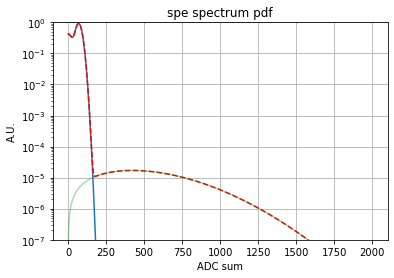

In [6]:
#x3=x3/58
plt.plot(x3,spe3)
plt.plot(x3,afterPulse+spe3,'r--')
plt.plot(x3,afterPulse,'g',alpha=.3)
gain = np.sum(x3*doubleGaussConstrained(x3,pp,res,mu2,nn))
print("gain : ",gain)
print(spe3.sum())
plt.title("spe spectrum pdf")
plt.gca().set_xlabel("ADC sum")
plt.gca().set_ylim(1e-7,1)
plt.gca().set_ylabel("A.U.")
plt.gca().set_yscale("log", nonposy='clip')
plt.gca().grid(True)

gain :  58.031529843131445
58.202473784902025


(0, 180.0)

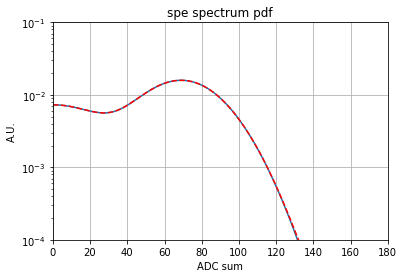

In [19]:
plt.plot(x3,spe3/58.)
plt.plot(x3,afterPulse+spe3/58,'r--')
gain = np.sum(x3*doubleGaussConstrained(x3,pp,res,mu2,nn))
print("gain : ",gain)
print(spe3.sum())

plt.title("spe spectrum pdf")
plt.gca().set_xlabel("ADC sum")
plt.gca().set_ylim(1e-4,1e-1)
plt.gca().set_ylabel("A.U.")
plt.gca().set_yscale("log", nonposy='clip')
plt.gca().grid(True)
plt.gca().set_xlim(0,3.*60)

In [8]:
print(afterPulse.sum()*(x3[-1]-x3[0])/58./len(x3))
print(logQuad(0,*fitres)/60*1000/343.)


0.00020510498289010132
0.00020521039844509232


gain :  1.0005436179850251
58.202473784902025


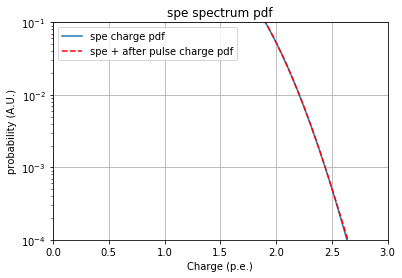

In [9]:
plt.plot(x3/58,spe3,label="spe charge pdf")
plt.plot(x3/58,afterPulse+spe3,'r--',label="spe + after pulse charge pdf")
gain = np.sum(x3/58*doubleGaussConstrained(x3,pp,res,mu2,nn))
print("gain : ",gain)
print(spe3.sum())

plt.title("spe spectrum pdf")
plt.gca().set_xlabel("Charge (p.e.)")
plt.gca().set_ylim(1e-4,1e-1)
plt.gca().set_ylabel("probability (A.U.)")
plt.gca().set_yscale("log", nonposy='clip')
plt.gca().grid(True)
plt.gca().set_xlim(0,3)
plt.gca().legend()

gain :  58.031529843131445
58.202473784902025


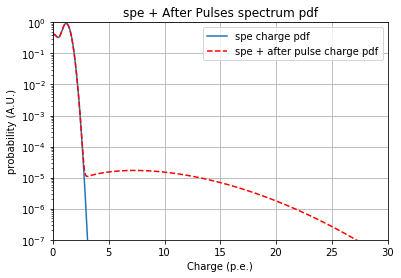

In [20]:
plt.plot(x3/58,spe3,label="spe charge pdf")
plt.plot(x3/58,afterPulse+spe3,'r--',label="spe + after pulse charge pdf")
gain = np.sum(x3*doubleGaussConstrained(x3,pp,res,mu2,nn))
print("gain : ",gain)
print(spe3.sum())

plt.title("spe + After Pulses spectrum pdf")
plt.gca().set_xlabel("Charge (p.e.)")
plt.gca().set_ylim(1e-7,1e0)
plt.gca().set_ylabel("probability (A.U.)")
plt.gca().set_yscale("log", nonposy='clip')
plt.gca().grid(True)
plt.gca().set_xlim(0,30)
plt.gca().legend()

In [11]:
for ii in range(len(spe3)):
    ##print("{:.4}\t{:.6}\t{:.5}".format(x3[ii]/58,spe3[ii],spe3[ii]+afterPulse[ii]))
    print("{:.4}\t & \t{:.6}\t & \t{:.5} \\\\ ".format(x3[ii]/58,spe3[ii],spe3[ii]+afterPulse[ii]))

0.0	 & 	0.421887	 & 	0.42189 \\ 
0.01724	 & 	0.421891	 & 	0.42189 \\ 
0.03448	 & 	0.42131	 & 	0.42131 \\ 
0.05172	 & 	0.420158	 & 	0.42016 \\ 
0.06897	 & 	0.418454	 & 	0.41845 \\ 
0.08621	 & 	0.416218	 & 	0.41622 \\ 
0.1034	 & 	0.413477	 & 	0.41348 \\ 
0.1207	 & 	0.410261	 & 	0.41026 \\ 
0.1379	 & 	0.406604	 & 	0.4066 \\ 
0.1552	 & 	0.402546	 & 	0.40255 \\ 
0.1724	 & 	0.398129	 & 	0.39813 \\ 
0.1897	 & 	0.393399	 & 	0.3934 \\ 
0.2069	 & 	0.388408	 & 	0.38841 \\ 
0.2241	 & 	0.38321	 & 	0.38321 \\ 
0.2414	 & 	0.377864	 & 	0.37786 \\ 
0.2586	 & 	0.37243	 & 	0.37243 \\ 
0.2759	 & 	0.366975	 & 	0.36698 \\ 
0.2931	 & 	0.361566	 & 	0.36157 \\ 
0.3103	 & 	0.356273	 & 	0.35627 \\ 
0.3276	 & 	0.351171	 & 	0.35117 \\ 
0.3448	 & 	0.346334	 & 	0.34634 \\ 
0.3621	 & 	0.341839	 & 	0.34184 \\ 
0.3793	 & 	0.337765	 & 	0.33777 \\ 
0.3966	 & 	0.334189	 & 	0.33419 \\ 
0.4138	 & 	0.331191	 & 	0.33119 \\ 
0.431	 & 	0.32885	 & 	0.32885 \\ 
0.4483	 & 	0.327242	 & 	0.32724 \\ 
0.4655	 & 	0.326444	 & 	0.32645 \

In [12]:
fff ='/local/home/ttaverni/cta-nectar/NectarCamPyUaf/cta/MyNectar/scripts/Nectarpipe_2.0/spe_afterpulse_pdf_NectarCam_14032019.dat'

In [13]:
from astropy.io import ascii
aaa = ascii.read(fff)

In [14]:
aaa['col3'].sum()

58.214375374412796

gain :  58.031529843131445
int : 58.202473784902025
esp :  58.03092489087046


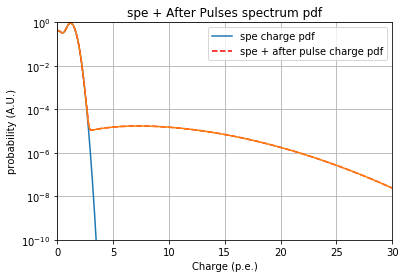

In [15]:
plt.plot(x3/58,spe3,label="spe charge pdf")
plt.plot(x3/58,afterPulse+spe3,'r--',label="spe + after pulse charge pdf")
plt.plot(aaa['col1'],aaa['col3'])
gain = np.sum(x3*doubleGaussConstrained(x3,pp,res,mu2,nn))
print("gain : ",gain)

print("int :",(spe3*(x3[1]-x3[0]) ).sum())

print("esp : ",(aaa['col1']*aaa['col2']).sum())

plt.title("spe + After Pulses spectrum pdf")
plt.gca().set_xlabel("Charge (p.e.)")
plt.gca().set_ylim(1e-10,1e0)
plt.gca().set_ylabel("probability (A.U.)")
plt.gca().set_yscale("log", nonposy='clip')
plt.gca().grid(True)
plt.gca().set_xlim(0,30)
plt.gca().legend()

In [16]:
ff2 ="./Pulse_template_nectarCam_22112018.dat"
bbb = ascii.read(ff2)

/local/home/ttaverni/anaconda3/envs/nectarchain-dev/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/local/home/ttaverni/anaconda3/envs/nectarchain-dev/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


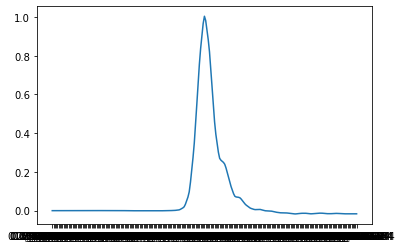

In [17]:
plt.plot(bbb['col1'],bbb['col2'])

In [18]:
bbb['col2'][::4].sum()*14

57.5761529714